In [26]:
import pandas as pd
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt


In [27]:
df = pd.read_csv('multimodal_train.tsv',sep='\t')

In [28]:
df.shape

(564000, 16)

In [29]:
df.head()

,author,clean_title,created_utc,domain,hasImage,id,image_url,linked_submission_id,num_comments,score,subreddit,title,upvote_ratio,2_way_label,3_way_label,6_way_label
0,Alexithymia,my walgreens offbrand mucinex was engraved wit...,1.551641e+09,i.imgur.com,True,awxhir,https://external-preview.redd.it/WylDbZrnbvZdB...,NaN,2.0,12,mildlyinteresting,My Walgreens offbrand Mucinex was engraved wit...,0.84,1,0,0
1,VIDCAs17,this concerned sink with a tiny hat,1.534727e+09,i.redd.it,True,98pbid,https://preview.redd.it/wsfx0gp0f5h11.jpg?widt...,NaN,2.0,119,pareidolia,This concerned sink with a tiny hat,0.99,0,2,2
2,prometheus1123,hackers leak emails from uae ambassador to us,1.496511e+09,aljazeera.com,True,6f2cy5,https://external-preview.redd.it/6fNhdbc6K1vFA...,NaN,1.0,44,neutralnews,Hackers leak emails from UAE ambassador to US,0.92,1,0,0
3,NaN,puppy taking in the view,1.471341e+09,i.imgur.com,True,4xypkv,https://external-preview.redd.it/HLtVNhTR6wtYt...,NaN,26.0,250,photoshopbattles,PsBattle: Puppy taking in the view,0.95,1,0,0
4,3rikR3ith,i found a face in my sheet music too,1.525318e+09,i.redd.it,True,8gnet9,https://preview.redd.it/ri7ut2wn8kv01.jpg?widt...,NaN,2.0,13,pareidolia,I found a face in my sheet music too!,0.84,0,2,2


In [30]:
#only take 5000 samples
df = df.head(5000)

In [36]:
selected_columns_indices = [1,4,6,8,9,12, 13, 14, 15]  # Indices of columns you want to print
df.iloc[:, selected_columns_indices].head()

,clean_title,hasImage,image_url,num_comments,score,upvote_ratio,2_way_label,3_way_label,6_way_label
0,my walgreens offbrand mucinex was engraved wit...,True,https://external-preview.redd.it/WylDbZrnbvZdB...,2.0,12,0.84,1,0,0
1,this concerned sink with a tiny hat,True,https://preview.redd.it/wsfx0gp0f5h11.jpg?widt...,2.0,119,0.99,0,2,2
2,hackers leak emails from uae ambassador to us,True,https://external-preview.redd.it/6fNhdbc6K1vFA...,1.0,44,0.92,1,0,0
3,puppy taking in the view,True,https://external-preview.redd.it/HLtVNhTR6wtYt...,26.0,250,0.95,1,0,0
4,i found a face in my sheet music too,True,https://preview.redd.it/ri7ut2wn8kv01.jpg?widt...,2.0,13,0.84,0,2,2


In [108]:
df.shape

(5000, 16)

In [109]:
image_urls = df['image_url'].tolist()

In [110]:
len(image_urls)

5000

In [91]:
import os
import requests
import time

# Function to download and save images from URLs
def download_images(image_urls, save_dir):
    # Create the directory if it doesn't exist
    os.makedirs(save_dir, exist_ok=True)
    images_not_downloaded = []
    for idx, url in enumerate(image_urls):
        try:
            response = requests.get(url)
            if response.status_code == 200:
                filename = f'image_train_{idx}.jpg'
                # Save the image to the specified directory
                with open(os.path.join(save_dir, filename), 'wb') as f:
                    f.write(response.content)
                print(f"Image {idx + 1} downloaded and saved as {filename}")
            else:
                images_not_downloaded.append(idx)
                print(f"Failed to download image {idx + 1} from URL: {url}")
            time.sleep(0.2)
        except Exception as e:
            images_not_downloaded.append(idx)
            print(f"Error downloading image {idx + 1}: {str(e)}")
    return images_not_downloaded

In [83]:
# Directory to save the downloaded images
save_directory = 'fakeddit_train'

# Call the function to download and save the images and return a list of rows 
#where the image could not be downloaded
removed_images = download_images(image_urls, save_directory)

Image 1 downloaded and saved as image_train_0.jpg
Failed to download image 2 from URL: https://preview.redd.it/wsfx0gp0f5h11.jpg?width=320&crop=smart&auto=webp&s=6267a3ae11e616453e129c58ae34635b98c4ab37
Image 3 downloaded and saved as image_train_2.jpg
Image 4 downloaded and saved as image_train_3.jpg
Failed to download image 5 from URL: https://preview.redd.it/ri7ut2wn8kv01.jpg?width=320&crop=smart&auto=webp&s=d44a419480c2073a2f0f3fa5f3701b308271331d
Image 6 downloaded and saved as image_train_5.jpg
Image 7 downloaded and saved as image_train_6.jpg
Image 8 downloaded and saved as image_train_7.jpg
Failed to download image 9 from URL: http://i.imgur.com/vbveIEd%2ejpg
Image 10 downloaded and saved as image_train_9.jpg
Image 11 downloaded and saved as image_train_10.jpg
Image 12 downloaded and saved as image_train_11.jpg
Failed to download image 13 from URL: http://i.imgur.com/mieY5EQ.jpg
Image 14 downloaded and saved as image_train_13.jpg
Image 15 downloaded and saved as image_train_14.

Image 132 downloaded and saved as image_train_131.jpg
Image 133 downloaded and saved as image_train_132.jpg
Image 134 downloaded and saved as image_train_133.jpg
Image 135 downloaded and saved as image_train_134.jpg
Image 136 downloaded and saved as image_train_135.jpg
Image 137 downloaded and saved as image_train_136.jpg
Failed to download image 138 from URL: http://i.imgur.com/1SbttZr.jpg
Failed to download image 139 from URL: https://i.imgur.com/lZm46us.jpg
Image 140 downloaded and saved as image_train_139.jpg
Image 141 downloaded and saved as image_train_140.jpg
Image 142 downloaded and saved as image_train_141.jpg
Failed to download image 143 from URL: http://i.imgur.com/Huey03U.jpg
Image 144 downloaded and saved as image_train_143.jpg
Failed to download image 145 from URL: https://preview.redd.it/3eyjmfqsyur21.jpg?width=320&crop=smart&auto=webp&s=94cad69004b499195dee3001372bd020bf146e93
Image 146 downloaded and saved as image_train_145.jpg
Image 147 downloaded and saved as image_

Failed to download image 264 from URL: http://i.imgur.com/KYgHsa1.jpg
Image 265 downloaded and saved as image_train_264.jpg
Failed to download image 266 from URL: http://i.imgur.com/lcRXwP9%2ejpg
Image 267 downloaded and saved as image_train_266.jpg
Image 268 downloaded and saved as image_train_267.jpg
Image 269 downloaded and saved as image_train_268.jpg
Failed to download image 270 from URL: http://i.imgur.com/4Z9r9pK.jpg
Image 271 downloaded and saved as image_train_270.jpg
Image 272 downloaded and saved as image_train_271.jpg
Image 273 downloaded and saved as image_train_272.jpg
Image 274 downloaded and saved as image_train_273.jpg
Failed to download image 275 from URL: http://i.imgur.com/i0hX20x.jpg
Image 276 downloaded and saved as image_train_275.jpg
Image 277 downloaded and saved as image_train_276.jpg
Failed to download image 278 from URL: http://i.imgur.com/7rjfX.jpg
Failed to download image 279 from URL: http://i.imgur.com/g9kn4ci.jpg
Failed to download image 280 from URL: h

Image 396 downloaded and saved as image_train_395.jpg
Image 397 downloaded and saved as image_train_396.jpg
Failed to download image 398 from URL: https://i.imgur.com/QCfI11X.jpg
Image 399 downloaded and saved as image_train_398.jpg
Image 400 downloaded and saved as image_train_399.jpg
Failed to download image 401 from URL: http://i.imgur.com/WgCKyL4.jpg
Image 402 downloaded and saved as image_train_401.jpg
Image 403 downloaded and saved as image_train_402.jpg
Image 404 downloaded and saved as image_train_403.jpg
Image 405 downloaded and saved as image_train_404.jpg
Image 406 downloaded and saved as image_train_405.jpg
Image 407 downloaded and saved as image_train_406.jpg
Failed to download image 408 from URL: https://i.imgur.com/lyMV6Gx.jpg
Image 409 downloaded and saved as image_train_408.jpg
Failed to download image 410 from URL: http://i.imgur.com/sWjY8s9.jpg
Image 411 downloaded and saved as image_train_410.jpg
Image 412 downloaded and saved as image_train_411.jpg
Image 413 downlo

Image 527 downloaded and saved as image_train_526.jpg
Image 528 downloaded and saved as image_train_527.jpg
Failed to download image 529 from URL: https://preview.redd.it/lpovyq24z5k21.jpg?width=320&crop=smart&auto=webp&s=f5c03507a6052d81c74f01b5c2ec515b88da955b
Failed to download image 530 from URL: http://i.imgur.com/lkrJ9AO.jpg
Failed to download image 531 from URL: http://i.imgur.com/kMPUUwC.jpg
Image 532 downloaded and saved as image_train_531.jpg
Failed to download image 533 from URL: http://i.imgur.com/X2jx7ni.jpg
Image 534 downloaded and saved as image_train_533.jpg
Image 535 downloaded and saved as image_train_534.jpg
Image 536 downloaded and saved as image_train_535.jpg
Image 537 downloaded and saved as image_train_536.jpg
Failed to download image 538 from URL: http://i.imgur.com/uTPsXdP%2ejpg
Failed to download image 539 from URL: https://preview.redd.it/gsubhxvqr2e31.jpg?width=320&crop=smart&auto=webp&s=cc5f117a36a4a7730b6e8d3261f2ebcaf2c3c2e1
Image 540 downloaded and saved

Failed to download image 646 from URL: http://i.imgur.com/5FMc7rS%2ejpg
Failed to download image 647 from URL: http://i.imgur.com/Z5YWsrC.jpg
Image 648 downloaded and saved as image_train_647.jpg
Image 649 downloaded and saved as image_train_648.jpg
Image 650 downloaded and saved as image_train_649.jpg
Image 651 downloaded and saved as image_train_650.jpg
Image 652 downloaded and saved as image_train_651.jpg
Failed to download image 653 from URL: http://i.imgur.com/e3XDUPs.jpg
Image 654 downloaded and saved as image_train_653.jpg
Image 655 downloaded and saved as image_train_654.jpg
Image 656 downloaded and saved as image_train_655.jpg
Image 657 downloaded and saved as image_train_656.jpg
Image 658 downloaded and saved as image_train_657.jpg
Image 659 downloaded and saved as image_train_658.jpg
Image 660 downloaded and saved as image_train_659.jpg
Image 661 downloaded and saved as image_train_660.jpg
Image 662 downloaded and saved as image_train_661.jpg
Failed to download image 663 fro

Failed to download image 776 from URL: https://i.imgur.com/7OQRRdE.jpg
Image 777 downloaded and saved as image_train_776.jpg
Image 778 downloaded and saved as image_train_777.jpg
Image 779 downloaded and saved as image_train_778.jpg
Image 780 downloaded and saved as image_train_779.jpg
Failed to download image 781 from URL: http://i.imgur.com/MmMyD.jpg
Image 782 downloaded and saved as image_train_781.jpg
Failed to download image 783 from URL: http://i.imgur.com/NyUKwHR.jpg
Failed to download image 784 from URL: http://i.imgur.com/FBlyq.jpg
Image 785 downloaded and saved as image_train_784.jpg
Image 786 downloaded and saved as image_train_785.jpg
Image 787 downloaded and saved as image_train_786.jpg
Failed to download image 788 from URL: https://i.imgur.com/wvkVpv0.jpg
Image 789 downloaded and saved as image_train_788.jpg
Failed to download image 790 from URL: http://i.imgur.com/66HmqAd.jpg
Image 791 downloaded and saved as image_train_790.jpg
Failed to download image 792 from URL: htt

Image 906 downloaded and saved as image_train_905.jpg
Failed to download image 907 from URL: https://preview.redd.it/x93em2wp96831.jpg?width=320&crop=smart&auto=webp&s=a93a45b59768d1110dce9732acb07bf9fc455824
Image 908 downloaded and saved as image_train_907.jpg
Failed to download image 909 from URL: http://i.imgur.com/eYGCD03.jpg
Image 910 downloaded and saved as image_train_909.jpg
Image 911 downloaded and saved as image_train_910.jpg
Image 912 downloaded and saved as image_train_911.jpg
Image 913 downloaded and saved as image_train_912.jpg
Image 914 downloaded and saved as image_train_913.jpg
Image 915 downloaded and saved as image_train_914.jpg
Failed to download image 916 from URL: http://i.imgur.com/cu5mFwc%2ejpg
Image 917 downloaded and saved as image_train_916.jpg
Image 918 downloaded and saved as image_train_917.jpg
Image 919 downloaded and saved as image_train_918.jpg
Image 920 downloaded and saved as image_train_919.jpg
Image 921 downloaded and saved as image_train_920.jpg
I

Failed to download image 1039 from URL: https://i.imgur.com/ApGE8xx.jpg
Image 1040 downloaded and saved as image_train_1039.jpg
Failed to download image 1041 from URL: https://preview.redd.it/ud77ml2agzn21.jpg?width=320&crop=smart&auto=webp&s=08453ad0248a16674ce663bcf4b4cf05762b56e0
Image 1042 downloaded and saved as image_train_1041.jpg
Image 1043 downloaded and saved as image_train_1042.jpg
Failed to download image 1044 from URL: http://i.imgur.com/2xBwlvb.jpg
Failed to download image 1045 from URL: http://i.imgur.com/Fcr7Sl1.jpg
Failed to download image 1046 from URL: https://i.imgur.com/IvMsKAt%2ejpg
Failed to download image 1047 from URL: http://i.imgur.com/dn5sirv.jpg
Image 1048 downloaded and saved as image_train_1047.jpg
Failed to download image 1049 from URL: http://i.imgur.com/Fs1NlZj.jpg
Image 1050 downloaded and saved as image_train_1049.jpg
Failed to download image 1051 from URL: http://i.imgur.com/chFTDBt.jpg
Image 1052 downloaded and saved as image_train_1051.jpg
Image 1

Image 1163 downloaded and saved as image_train_1162.jpg
Image 1164 downloaded and saved as image_train_1163.jpg
Failed to download image 1165 from URL: http://i.imgur.com/wFSCcyM.jpg
Image 1166 downloaded and saved as image_train_1165.jpg
Failed to download image 1167 from URL: http://i.imgur.com/W7xyjAT.jpg
Failed to download image 1168 from URL: https://i.imgur.com/o4ibxrO.jpg
Image 1169 downloaded and saved as image_train_1168.jpg
Failed to download image 1170 from URL: http://i.imgur.com/N5x8zvv.jpg
Failed to download image 1171 from URL: http://i.imgur.com/czZ2iPx.jpg
Image 1172 downloaded and saved as image_train_1171.jpg
Image 1173 downloaded and saved as image_train_1172.jpg
Failed to download image 1174 from URL: http://i.imgur.com/cadfiT8.jpg
Failed to download image 1175 from URL: http://i.imgur.com/cK9VPDi.jpg
Image 1176 downloaded and saved as image_train_1175.jpg
Image 1177 downloaded and saved as image_train_1176.jpg
Image 1178 downloaded and saved as image_train_1177.jp

Image 1289 downloaded and saved as image_train_1288.jpg
Failed to download image 1290 from URL: http://i.imgur.com/WBdwK6M.jpg
Image 1291 downloaded and saved as image_train_1290.jpg
Image 1292 downloaded and saved as image_train_1291.jpg
Image 1293 downloaded and saved as image_train_1292.jpg
Image 1294 downloaded and saved as image_train_1293.jpg
Failed to download image 1295 from URL: http://i.imgur.com/iVRFqHg.jpg
Image 1296 downloaded and saved as image_train_1295.jpg
Failed to download image 1297 from URL: http://i.imgur.com/IOTTNU9.jpg
Failed to download image 1298 from URL: http://i.imgur.com/YKstDOe.jpg
Failed to download image 1299 from URL: http://i.imgur.com/wgAy9AP.jpg
Image 1300 downloaded and saved as image_train_1299.jpg
Image 1301 downloaded and saved as image_train_1300.jpg
Failed to download image 1302 from URL: https://preview.redd.it/gnha5xgow1b31.jpg?width=320&crop=smart&auto=webp&s=5ed6ae1b0cc621b2bbcb8d507d18206dc9c0d9f9
Image 1303 downloaded and saved as image_

Failed to download image 1417 from URL: http://i.imgur.com/MNT8YbI.jpg
Image 1418 downloaded and saved as image_train_1417.jpg
Image 1419 downloaded and saved as image_train_1418.jpg
Failed to download image 1420 from URL: http://i.imgur.com/pnE0c64.jpg
Image 1421 downloaded and saved as image_train_1420.jpg
Failed to download image 1422 from URL: https://preview.redd.it/nr6m3m8w2a801.jpg?width=320&crop=smart&auto=webp&s=d6697cfad9c80cb964dc566b36109f66ccee2570
Failed to download image 1423 from URL: http://i.imgur.com/2ih0EVP.jpg
Image 1424 downloaded and saved as image_train_1423.jpg
Image 1425 downloaded and saved as image_train_1424.jpg
Image 1426 downloaded and saved as image_train_1425.jpg
Image 1427 downloaded and saved as image_train_1426.jpg
Image 1428 downloaded and saved as image_train_1427.jpg
Image 1429 downloaded and saved as image_train_1428.jpg
Image 1430 downloaded and saved as image_train_1429.jpg
Image 1431 downloaded and saved as image_train_1430.jpg
Failed to downl

Image 1548 downloaded and saved as image_train_1547.jpg
Image 1549 downloaded and saved as image_train_1548.jpg
Image 1550 downloaded and saved as image_train_1549.jpg
Image 1551 downloaded and saved as image_train_1550.jpg
Image 1552 downloaded and saved as image_train_1551.jpg
Image 1553 downloaded and saved as image_train_1552.jpg
Image 1554 downloaded and saved as image_train_1553.jpg
Image 1555 downloaded and saved as image_train_1554.jpg
Failed to download image 1556 from URL: http://i.imgur.com/LUKS9gZ.jpg
Image 1557 downloaded and saved as image_train_1556.jpg
Image 1558 downloaded and saved as image_train_1557.jpg
Failed to download image 1559 from URL: http://i.imgur.com/8UbAMrQ.jpg
Image 1560 downloaded and saved as image_train_1559.jpg
Image 1561 downloaded and saved as image_train_1560.jpg
Failed to download image 1562 from URL: http://i.imgur.com/1ne51bo.jpg
Failed to download image 1563 from URL: http://i.imgur.com/NELUO.jpg
Failed to download image 1564 from URL: http:/

Image 1679 downloaded and saved as image_train_1678.jpg
Image 1680 downloaded and saved as image_train_1679.jpg
Failed to download image 1681 from URL: http://i.imgur.com/kUOsNnB.jpg
Failed to download image 1682 from URL: http://imgur.com/hVbYCQA%2ejpg
Image 1683 downloaded and saved as image_train_1682.jpg
Image 1684 downloaded and saved as image_train_1683.jpg
Image 1685 downloaded and saved as image_train_1684.jpg
Image 1686 downloaded and saved as image_train_1685.jpg
Image 1687 downloaded and saved as image_train_1686.jpg
Failed to download image 1688 from URL: http://i.imgur.com/n4aHYgv%2ejpg
Image 1689 downloaded and saved as image_train_1688.jpg
Image 1690 downloaded and saved as image_train_1689.jpg
Image 1691 downloaded and saved as image_train_1690.jpg
Failed to download image 1692 from URL: http://i.imgur.com/8o07orO.jpg
Failed to download image 1693 from URL: http://i.imgur.com/FoKobJr.jpg
Image 1694 downloaded and saved as image_train_1693.jpg
Failed to download image 16

Image 1813 downloaded and saved as image_train_1812.jpg
Failed to download image 1814 from URL: http://i.imgur.com/2U0hzyc.jpg
Image 1815 downloaded and saved as image_train_1814.jpg
Failed to download image 1816 from URL: http://i.imgur.com/w5fCq0n.jpg
Image 1817 downloaded and saved as image_train_1816.jpg
Image 1818 downloaded and saved as image_train_1817.jpg
Image 1819 downloaded and saved as image_train_1818.jpg
Image 1820 downloaded and saved as image_train_1819.jpg
Image 1821 downloaded and saved as image_train_1820.jpg
Image 1822 downloaded and saved as image_train_1821.jpg
Image 1823 downloaded and saved as image_train_1822.jpg
Image 1824 downloaded and saved as image_train_1823.jpg
Image 1825 downloaded and saved as image_train_1824.jpg
Image 1826 downloaded and saved as image_train_1825.jpg
Image 1827 downloaded and saved as image_train_1826.jpg
Image 1828 downloaded and saved as image_train_1827.jpg
Image 1829 downloaded and saved as image_train_1828.jpg
Failed to download

Image 1939 downloaded and saved as image_train_1938.jpg
Failed to download image 1940 from URL: http://imgur.com/vMb9XK0%2ejpg
Image 1941 downloaded and saved as image_train_1940.jpg
Image 1942 downloaded and saved as image_train_1941.jpg
Image 1943 downloaded and saved as image_train_1942.jpg
Image 1944 downloaded and saved as image_train_1943.jpg
Image 1945 downloaded and saved as image_train_1944.jpg
Failed to download image 1946 from URL: http://i.imgur.com/gytXeJL.jpg
Failed to download image 1947 from URL: http://i.imgur.com/p530Fos.jpg
Failed to download image 1948 from URL: http://i.imgur.com/NLGPMAI.jpg
Image 1949 downloaded and saved as image_train_1948.jpg
Failed to download image 1950 from URL: http://i.imgur.com/2TPoyqM.jpg
Image 1951 downloaded and saved as image_train_1950.jpg
Failed to download image 1952 from URL: http://imgur.com/AYBWMjI.jpg
Image 1953 downloaded and saved as image_train_1952.jpg
Image 1954 downloaded and saved as image_train_1953.jpg
Image 1955 downl

Image 2068 downloaded and saved as image_train_2067.jpg
Image 2069 downloaded and saved as image_train_2068.jpg
Image 2070 downloaded and saved as image_train_2069.jpg
Failed to download image 2071 from URL: https://i.imgur.com/mXli0og.jpg
Failed to download image 2072 from URL: http://i.imgur.com/YBg2sk0.jpg
Failed to download image 2073 from URL: https://i.imgur.com/YVz1oad.jpg
Image 2074 downloaded and saved as image_train_2073.jpg
Image 2075 downloaded and saved as image_train_2074.jpg
Image 2076 downloaded and saved as image_train_2075.jpg
Image 2077 downloaded and saved as image_train_2076.jpg
Image 2078 downloaded and saved as image_train_2077.jpg
Image 2079 downloaded and saved as image_train_2078.jpg
Image 2080 downloaded and saved as image_train_2079.jpg
Image 2081 downloaded and saved as image_train_2080.jpg
Image 2082 downloaded and saved as image_train_2081.jpg
Image 2083 downloaded and saved as image_train_2082.jpg
Image 2084 downloaded and saved as image_train_2083.jpg
I

Failed to download image 2191 from URL: http://i.imgur.com/HG6AhDT.jpg
Image 2192 downloaded and saved as image_train_2191.jpg
Image 2193 downloaded and saved as image_train_2192.jpg
Image 2194 downloaded and saved as image_train_2193.jpg
Image 2195 downloaded and saved as image_train_2194.jpg
Image 2196 downloaded and saved as image_train_2195.jpg
Image 2197 downloaded and saved as image_train_2196.jpg
Failed to download image 2198 from URL: https://preview.redd.it/8zugu6day0j21.jpg?width=320&crop=smart&auto=webp&s=ab1d44afb81cbafe0ca113e8965ec84a3c7cd03f
Image 2199 downloaded and saved as image_train_2198.jpg
Image 2200 downloaded and saved as image_train_2199.jpg
Image 2201 downloaded and saved as image_train_2200.jpg
Image 2202 downloaded and saved as image_train_2201.jpg
Image 2203 downloaded and saved as image_train_2202.jpg
Failed to download image 2204 from URL: http://i.imgur.com/SBXuZts%2ejpg
Image 2205 downloaded and saved as image_train_2204.jpg
Image 2206 downloaded and sa

Failed to download image 2319 from URL: http://i.imgur.com/GDZj0tC.jpg
Image 2320 downloaded and saved as image_train_2319.jpg
Image 2321 downloaded and saved as image_train_2320.jpg
Image 2322 downloaded and saved as image_train_2321.jpg
Image 2323 downloaded and saved as image_train_2322.jpg
Failed to download image 2324 from URL: https://i.imgur.com/H8UTUAm.jpg
Failed to download image 2325 from URL: https://i.imgur.com/9K7Q2QB.jpg
Image 2326 downloaded and saved as image_train_2325.jpg
Image 2327 downloaded and saved as image_train_2326.jpg
Image 2328 downloaded and saved as image_train_2327.jpg
Image 2329 downloaded and saved as image_train_2328.jpg
Image 2330 downloaded and saved as image_train_2329.jpg
Image 2331 downloaded and saved as image_train_2330.jpg
Image 2332 downloaded and saved as image_train_2331.jpg
Image 2333 downloaded and saved as image_train_2332.jpg
Failed to download image 2334 from URL: http://i.imgur.com/gdDbw68.jpg
Failed to download image 2335 from URL: ht

Image 2446 downloaded and saved as image_train_2445.jpg
Failed to download image 2447 from URL: http://i.imgur.com/iiVsxUF.jpg
Image 2448 downloaded and saved as image_train_2447.jpg
Image 2449 downloaded and saved as image_train_2448.jpg
Failed to download image 2450 from URL: http://i.imgur.com/BJqVrFy.jpg
Image 2451 downloaded and saved as image_train_2450.jpg
Image 2452 downloaded and saved as image_train_2451.jpg
Image 2453 downloaded and saved as image_train_2452.jpg
Failed to download image 2454 from URL: http://i.imgur.com/2mlUc1N.jpg
Image 2455 downloaded and saved as image_train_2454.jpg
Image 2456 downloaded and saved as image_train_2455.jpg
Failed to download image 2457 from URL: http://i.imgur.com/EVTkaqf.jpg
Image 2458 downloaded and saved as image_train_2457.jpg
Image 2459 downloaded and saved as image_train_2458.jpg
Image 2460 downloaded and saved as image_train_2459.jpg
Image 2461 downloaded and saved as image_train_2460.jpg
Failed to download image 2462 from URL: http

Image 2575 downloaded and saved as image_train_2574.jpg
Image 2576 downloaded and saved as image_train_2575.jpg
Image 2577 downloaded and saved as image_train_2576.jpg
Failed to download image 2578 from URL: http://i.imgur.com/rC2tZz5.jpg
Failed to download image 2579 from URL: http://i.imgur.com/tkHCwHN.jpg
Failed to download image 2580 from URL: http://i.imgur.com/xJXtHv7.jpg
Image 2581 downloaded and saved as image_train_2580.jpg
Image 2582 downloaded and saved as image_train_2581.jpg
Image 2583 downloaded and saved as image_train_2582.jpg
Image 2584 downloaded and saved as image_train_2583.jpg
Image 2585 downloaded and saved as image_train_2584.jpg
Image 2586 downloaded and saved as image_train_2585.jpg
Failed to download image 2587 from URL: http://i.imgur.com/W991tjf.jpg
Failed to download image 2588 from URL: http://i.imgur.com/qIQYsyD.jpg
Image 2589 downloaded and saved as image_train_2588.jpg
Failed to download image 2590 from URL: http://i.imgur.com/mQi06Hx%2ejpg
Failed to do

Image 2708 downloaded and saved as image_train_2707.jpg
Image 2709 downloaded and saved as image_train_2708.jpg
Image 2710 downloaded and saved as image_train_2709.jpg
Image 2711 downloaded and saved as image_train_2710.jpg
Failed to download image 2712 from URL: http://i.imgur.com/UW4fIGV.jpg
Failed to download image 2713 from URL: http://i.imgur.com/maaZfwr.jpg
Failed to download image 2714 from URL: http://i.imgur.com/hR5ASkm.jpg
Image 2715 downloaded and saved as image_train_2714.jpg
Image 2716 downloaded and saved as image_train_2715.jpg
Image 2717 downloaded and saved as image_train_2716.jpg
Image 2718 downloaded and saved as image_train_2717.jpg
Failed to download image 2719 from URL: http://i.imgur.com/x3wWRzi.jpg
Image 2720 downloaded and saved as image_train_2719.jpg
Image 2721 downloaded and saved as image_train_2720.jpg
Failed to download image 2722 from URL: http://i.imgur.com/hvitl6i.jpg
Image 2723 downloaded and saved as image_train_2722.jpg
Image 2724 downloaded and sav

Failed to download image 2838 from URL: http://i.imgur.com/LQS5upI%2ejpg
Failed to download image 2839 from URL: https://preview.redd.it/jrsyerk8f8p31.jpg?width=320&crop=smart&auto=webp&s=d53e5a2e00eb661e67f00efa3c9eca200e59f140
Failed to download image 2840 from URL: http://i.imgur.com/3VmNwhe.jpg
Image 2841 downloaded and saved as image_train_2840.jpg
Image 2842 downloaded and saved as image_train_2841.jpg
Failed to download image 2843 from URL: http://i.imgur.com/Z8jumVo%2ejpg
Image 2844 downloaded and saved as image_train_2843.jpg
Failed to download image 2845 from URL: http://i.imgur.com/qYvPFp5.jpg
Failed to download image 2846 from URL: http://i.imgur.com/pzpTa7X.jpg
Image 2847 downloaded and saved as image_train_2846.jpg
Image 2848 downloaded and saved as image_train_2847.jpg
Image 2849 downloaded and saved as image_train_2848.jpg
Image 2850 downloaded and saved as image_train_2849.jpg
Image 2851 downloaded and saved as image_train_2850.jpg
Failed to download image 2852 from UR

Image 2961 downloaded and saved as image_train_2960.jpg
Failed to download image 2962 from URL: http://i.imgur.com/BsMq6K4.jpg
Image 2963 downloaded and saved as image_train_2962.jpg
Image 2964 downloaded and saved as image_train_2963.jpg
Image 2965 downloaded and saved as image_train_2964.jpg
Image 2966 downloaded and saved as image_train_2965.jpg
Image 2967 downloaded and saved as image_train_2966.jpg
Image 2968 downloaded and saved as image_train_2967.jpg
Image 2969 downloaded and saved as image_train_2968.jpg
Image 2970 downloaded and saved as image_train_2969.jpg
Failed to download image 2971 from URL: http://i.imgur.com/eEv3K.jpg
Image 2972 downloaded and saved as image_train_2971.jpg
Image 2973 downloaded and saved as image_train_2972.jpg
Image 2974 downloaded and saved as image_train_2973.jpg
Image 2975 downloaded and saved as image_train_2974.jpg
Image 2976 downloaded and saved as image_train_2975.jpg
Failed to download image 2977 from URL: http://i.imgur.com/33bA9ZZ.jpg
Faile

Failed to download image 3094 from URL: https://i.imgur.com/MnqaDfG.jpg
Image 3095 downloaded and saved as image_train_3094.jpg
Image 3096 downloaded and saved as image_train_3095.jpg
Failed to download image 3097 from URL: http://i.imgur.com/AUR3188.jpg
Failed to download image 3098 from URL: http://i.imgur.com/IFSoEfE.jpg
Failed to download image 3099 from URL: https://preview.redd.it/myol0s1yf8h31.png?width=320&crop=smart&auto=webp&s=de31adec74463b09896b925f8561ecf611369195
Failed to download image 3100 from URL: http://i.imgur.com/Wbdc9a3%2ejpg
Image 3101 downloaded and saved as image_train_3100.jpg
Failed to download image 3102 from URL: http://i.imgur.com/1Ap3zmS%2ejpg
Image 3103 downloaded and saved as image_train_3102.jpg
Image 3104 downloaded and saved as image_train_3103.jpg
Image 3105 downloaded and saved as image_train_3104.jpg
Image 3106 downloaded and saved as image_train_3105.jpg
Failed to download image 3107 from URL: http://i.imgur.com/PLgfWri.jpg
Failed to download im

Failed to download image 3221 from URL: http://i.imgur.com/jkkLy5i.jpg
Failed to download image 3222 from URL: http://i.imgur.com/rgj3d04.jpg
Failed to download image 3223 from URL: http://i.imgur.com/fuHzlxI.jpg
Image 3224 downloaded and saved as image_train_3223.jpg
Image 3225 downloaded and saved as image_train_3224.jpg
Image 3226 downloaded and saved as image_train_3225.jpg
Failed to download image 3227 from URL: http://i.imgur.com/q1NxLYj.jpg
Image 3228 downloaded and saved as image_train_3227.jpg
Image 3229 downloaded and saved as image_train_3228.jpg
Failed to download image 3230 from URL: http://i.imgur.com/zk07iU1.jpg
Image 3231 downloaded and saved as image_train_3230.jpg
Image 3232 downloaded and saved as image_train_3231.jpg
Image 3233 downloaded and saved as image_train_3232.jpg
Image 3234 downloaded and saved as image_train_3233.jpg
Image 3235 downloaded and saved as image_train_3234.jpg
Image 3236 downloaded and saved as image_train_3235.jpg
Failed to download image 3237

Image 3344 downloaded and saved as image_train_3343.jpg
Image 3345 downloaded and saved as image_train_3344.jpg
Image 3346 downloaded and saved as image_train_3345.jpg
Image 3347 downloaded and saved as image_train_3346.jpg
Image 3348 downloaded and saved as image_train_3347.jpg
Failed to download image 3349 from URL: http://i.imgur.com/fpUJWcD.jpg
Failed to download image 3350 from URL: https://i.imgur.com/j3pjkP6.jpg
Image 3351 downloaded and saved as image_train_3350.jpg
Image 3352 downloaded and saved as image_train_3351.jpg
Image 3353 downloaded and saved as image_train_3352.jpg
Image 3354 downloaded and saved as image_train_3353.jpg
Image 3355 downloaded and saved as image_train_3354.jpg
Image 3356 downloaded and saved as image_train_3355.jpg
Image 3357 downloaded and saved as image_train_3356.jpg
Image 3358 downloaded and saved as image_train_3357.jpg
Failed to download image 3359 from URL: http://i.imgur.com/JODxG.jpg
Image 3360 downloaded and saved as image_train_3359.jpg
Fail

Failed to download image 3471 from URL: http://i.imgur.com/6Kf0RJY%2ejpg
Image 3472 downloaded and saved as image_train_3471.jpg
Failed to download image 3473 from URL: https://preview.redd.it/qppllkrxhdk31.jpg?width=320&crop=smart&auto=webp&s=723390c089c9508139a2009772b1cecff15629ea
Image 3474 downloaded and saved as image_train_3473.jpg
Image 3475 downloaded and saved as image_train_3474.jpg
Image 3476 downloaded and saved as image_train_3475.jpg
Image 3477 downloaded and saved as image_train_3476.jpg
Image 3478 downloaded and saved as image_train_3477.jpg
Image 3479 downloaded and saved as image_train_3478.jpg
Image 3480 downloaded and saved as image_train_3479.jpg
Image 3481 downloaded and saved as image_train_3480.jpg
Image 3482 downloaded and saved as image_train_3481.jpg
Image 3483 downloaded and saved as image_train_3482.jpg
Image 3484 downloaded and saved as image_train_3483.jpg
Image 3485 downloaded and saved as image_train_3484.jpg
Failed to download image 3486 from URL: htt

Image 3600 downloaded and saved as image_train_3599.jpg
Image 3601 downloaded and saved as image_train_3600.jpg
Image 3602 downloaded and saved as image_train_3601.jpg
Failed to download image 3603 from URL: http://i.imgur.com/BCM1vmn.jpg
Image 3604 downloaded and saved as image_train_3603.jpg
Failed to download image 3605 from URL: http://i.imgur.com/YaMCBtB%2ejpg
Image 3606 downloaded and saved as image_train_3605.jpg
Image 3607 downloaded and saved as image_train_3606.jpg
Image 3608 downloaded and saved as image_train_3607.jpg
Image 3609 downloaded and saved as image_train_3608.jpg
Image 3610 downloaded and saved as image_train_3609.jpg
Image 3611 downloaded and saved as image_train_3610.jpg
Failed to download image 3612 from URL: http://i.imgur.com/K68gzXS%2ejpg
Image 3613 downloaded and saved as image_train_3612.jpg
Failed to download image 3614 from URL: https://preview.redd.it/2rvpdj67eim21.jpg?width=320&crop=smart&auto=webp&s=8efb1379eafc69783351f79edcbbbe6c563463c6
Image 3615 

Failed to download image 3731 from URL: http://i.imgur.com/Z2sYqs4.jpg
Image 3732 downloaded and saved as image_train_3731.jpg
Failed to download image 3733 from URL: http://i.imgur.com/obsqNTy.jpg
Image 3734 downloaded and saved as image_train_3733.jpg
Image 3735 downloaded and saved as image_train_3734.jpg
Image 3736 downloaded and saved as image_train_3735.jpg
Image 3737 downloaded and saved as image_train_3736.jpg
Image 3738 downloaded and saved as image_train_3737.jpg
Failed to download image 3739 from URL: http://i.imgur.com/ULzAaaO.jpg
Failed to download image 3740 from URL: http://i.imgur.com/sBRSbxj.jpg
Failed to download image 3741 from URL: http://i.imgur.com/7ZVEl.jpg
Image 3742 downloaded and saved as image_train_3741.jpg
Image 3743 downloaded and saved as image_train_3742.jpg
Image 3744 downloaded and saved as image_train_3743.jpg
Image 3745 downloaded and saved as image_train_3744.jpg
Image 3746 downloaded and saved as image_train_3745.jpg
Image 3747 downloaded and saved

Image 3855 downloaded and saved as image_train_3854.jpg
Image 3856 downloaded and saved as image_train_3855.jpg
Image 3857 downloaded and saved as image_train_3856.jpg
Image 3858 downloaded and saved as image_train_3857.jpg
Image 3859 downloaded and saved as image_train_3858.jpg
Image 3860 downloaded and saved as image_train_3859.jpg
Failed to download image 3861 from URL: http://i.imgur.com/gOYn6AM.jpg
Image 3862 downloaded and saved as image_train_3861.jpg
Image 3863 downloaded and saved as image_train_3862.jpg
Image 3864 downloaded and saved as image_train_3863.jpg
Failed to download image 3865 from URL: http://i.imgur.com/1R8JX4Q.jpg
Image 3866 downloaded and saved as image_train_3865.jpg
Image 3867 downloaded and saved as image_train_3866.jpg
Image 3868 downloaded and saved as image_train_3867.jpg
Image 3869 downloaded and saved as image_train_3868.jpg
Image 3870 downloaded and saved as image_train_3869.jpg
Failed to download image 3871 from URL: http://i.imgur.com/wgqr2IH.jpg
Ima

Image 3985 downloaded and saved as image_train_3984.jpg
Image 3986 downloaded and saved as image_train_3985.jpg
Image 3987 downloaded and saved as image_train_3986.jpg
Image 3988 downloaded and saved as image_train_3987.jpg
Image 3989 downloaded and saved as image_train_3988.jpg
Image 3990 downloaded and saved as image_train_3989.jpg
Image 3991 downloaded and saved as image_train_3990.jpg
Failed to download image 3992 from URL: http://i.imgur.com/YXMRdsj%2ejpg
Image 3993 downloaded and saved as image_train_3992.jpg
Image 3994 downloaded and saved as image_train_3993.jpg
Failed to download image 3995 from URL: http://i.imgur.com/AYya0Ow.jpg
Image 3996 downloaded and saved as image_train_3995.jpg
Image 3997 downloaded and saved as image_train_3996.jpg
Failed to download image 3998 from URL: http://i.imgur.com/AB8MM4C.jpg
Failed to download image 3999 from URL: http://imgur.com/KqoaYw6.jpg
Image 4000 downloaded and saved as image_train_3999.jpg
Failed to download image 4001 from URL: http

Image 4112 downloaded and saved as image_train_4111.jpg
Image 4113 downloaded and saved as image_train_4112.jpg
Failed to download image 4114 from URL: http://i.imgur.com/1ewnOZq.jpg
Image 4115 downloaded and saved as image_train_4114.jpg
Image 4116 downloaded and saved as image_train_4115.jpg
Image 4117 downloaded and saved as image_train_4116.jpg
Failed to download image 4118 from URL: http://i.imgur.com/l8o8GQx.jpg
Image 4119 downloaded and saved as image_train_4118.jpg
Image 4120 downloaded and saved as image_train_4119.jpg
Image 4121 downloaded and saved as image_train_4120.jpg
Image 4122 downloaded and saved as image_train_4121.jpg
Image 4123 downloaded and saved as image_train_4122.jpg
Image 4124 downloaded and saved as image_train_4123.jpg
Image 4125 downloaded and saved as image_train_4124.jpg
Image 4126 downloaded and saved as image_train_4125.jpg
Image 4127 downloaded and saved as image_train_4126.jpg
Image 4128 downloaded and saved as image_train_4127.jpg
Failed to download

Failed to download image 4244 from URL: http://i.imgur.com/eXye2JT.jpg
Image 4245 downloaded and saved as image_train_4244.jpg
Image 4246 downloaded and saved as image_train_4245.jpg
Image 4247 downloaded and saved as image_train_4246.jpg
Failed to download image 4248 from URL: http://i.imgur.com/ehrtLbc.jpg
Image 4249 downloaded and saved as image_train_4248.jpg
Image 4250 downloaded and saved as image_train_4249.jpg
Image 4251 downloaded and saved as image_train_4250.jpg
Image 4252 downloaded and saved as image_train_4251.jpg
Image 4253 downloaded and saved as image_train_4252.jpg
Image 4254 downloaded and saved as image_train_4253.jpg
Failed to download image 4255 from URL: https://i.imgur.com/da7zWcU.jpg
Image 4256 downloaded and saved as image_train_4255.jpg
Failed to download image 4257 from URL: http://i.imgur.com/4aL4gBs.jpg
Failed to download image 4258 from URL: https://i.imgur.com/xUJ6Xmj.jpg](https://i.imgur.com/xUJ6Xmj.jpg
Image 4259 downloaded and saved as image_train_425

Image 4369 downloaded and saved as image_train_4368.jpg
Failed to download image 4370 from URL: https://i.imgur.com/Pa9puIC.jpg
Image 4371 downloaded and saved as image_train_4370.jpg
Failed to download image 4372 from URL: https://i.imgur.com/jd4DE0V.jpg
Image 4373 downloaded and saved as image_train_4372.jpg
Image 4374 downloaded and saved as image_train_4373.jpg
Image 4375 downloaded and saved as image_train_4374.jpg
Image 4376 downloaded and saved as image_train_4375.jpg
Failed to download image 4377 from URL: http://i.imgur.com/W4fZbbD.jpg
Error downloading image 4378: Invalid URL 'nan': No scheme supplied. Perhaps you meant http://nan?
Failed to download image 4379 from URL: http://i.imgur.com/7gyfJ.jpg
Image 4380 downloaded and saved as image_train_4379.jpg
Failed to download image 4381 from URL: http://i.imgur.com/3zVZosE.jpg
Failed to download image 4382 from URL: https://preview.redd.it/lzes40y74kn31.jpg?width=320&crop=smart&auto=webp&s=71c5525b5699d84281f766546d29434d23db4f2

Failed to download image 4495 from URL: https://preview.redd.it/rjcbmqkui8p31.jpg?width=320&crop=smart&auto=webp&s=948ba4f77e86fe5ea675665411cf3b897c3a2376
Image 4496 downloaded and saved as image_train_4495.jpg
Failed to download image 4497 from URL: https://i.imgur.com/HrFUfdI.jpg
Image 4498 downloaded and saved as image_train_4497.jpg
Image 4499 downloaded and saved as image_train_4498.jpg
Image 4500 downloaded and saved as image_train_4499.jpg
Failed to download image 4501 from URL: http://i.imgur.com/hccMOYE.jpg
Image 4502 downloaded and saved as image_train_4501.jpg
Image 4503 downloaded and saved as image_train_4502.jpg
Image 4504 downloaded and saved as image_train_4503.jpg
Failed to download image 4505 from URL: http://i.imgur.com/7kgBO.jpg
Failed to download image 4506 from URL: http://i.imgur.com/lkozQ.jpg
Image 4507 downloaded and saved as image_train_4506.jpg
Image 4508 downloaded and saved as image_train_4507.jpg
Failed to download image 4509 from URL: http://i.imgur.com/

Image 4622 downloaded and saved as image_train_4621.jpg
Image 4623 downloaded and saved as image_train_4622.jpg
Image 4624 downloaded and saved as image_train_4623.jpg
Image 4625 downloaded and saved as image_train_4624.jpg
Failed to download image 4626 from URL: http://i.imgur.com/WHUUxvl.jpg
Image 4627 downloaded and saved as image_train_4626.jpg
Image 4628 downloaded and saved as image_train_4627.jpg
Image 4629 downloaded and saved as image_train_4628.jpg
Image 4630 downloaded and saved as image_train_4629.jpg
Image 4631 downloaded and saved as image_train_4630.jpg
Failed to download image 4632 from URL: http://i.imgur.com/Z8uit7e.jpg
Image 4633 downloaded and saved as image_train_4632.jpg
Image 4634 downloaded and saved as image_train_4633.jpg
Image 4635 downloaded and saved as image_train_4634.jpg
Image 4636 downloaded and saved as image_train_4635.jpg
Failed to download image 4637 from URL: https://i.imgur.com/Frk49cs.jpg](https://i.imgur.com/Frk49cs.jpg
Image 4638 downloaded and

Image 4757 downloaded and saved as image_train_4756.jpg
Image 4758 downloaded and saved as image_train_4757.jpg
Failed to download image 4759 from URL: http://i.imgur.com/OQ8bGIl.jpg
Failed to download image 4760 from URL: http://i.imgur.com/dM96ZGS.jpg
Image 4761 downloaded and saved as image_train_4760.jpg
Image 4762 downloaded and saved as image_train_4761.jpg
Failed to download image 4763 from URL: http://i.imgur.com/ITXKb3v.jpg
Image 4764 downloaded and saved as image_train_4763.jpg
Image 4765 downloaded and saved as image_train_4764.jpg
Failed to download image 4766 from URL: http://i.imgur.com/wJMkP1q.jpg
Image 4767 downloaded and saved as image_train_4766.jpg
Failed to download image 4768 from URL: http://i.imgur.com/vbVGwmL.jpg
Image 4769 downloaded and saved as image_train_4768.jpg
Image 4770 downloaded and saved as image_train_4769.jpg
Image 4771 downloaded and saved as image_train_4770.jpg
Failed to download image 4772 from URL: http://i.imgur.com/spQ4ny2.jpg
Failed to down

Image 4884 downloaded and saved as image_train_4883.jpg
Image 4885 downloaded and saved as image_train_4884.jpg
Failed to download image 4886 from URL: http://i.imgur.com/gDnxLhO%2ejpg
Image 4887 downloaded and saved as image_train_4886.jpg
Image 4888 downloaded and saved as image_train_4887.jpg
Image 4889 downloaded and saved as image_train_4888.jpg
Image 4890 downloaded and saved as image_train_4889.jpg
Failed to download image 4891 from URL: http://i.imgur.com/YGJ7m.jpg
Failed to download image 4892 from URL: http://i.imgur.com/DXRc1.jpg
Image 4893 downloaded and saved as image_train_4892.jpg
Image 4894 downloaded and saved as image_train_4893.jpg
Failed to download image 4895 from URL: https://I.imgur.com/PQHyRp9.jpg
Image 4896 downloaded and saved as image_train_4895.jpg
Image 4897 downloaded and saved as image_train_4896.jpg
Image 4898 downloaded and saved as image_train_4897.jpg
Image 4899 downloaded and saved as image_train_4898.jpg
Failed to download image 4900 from URL: http:

In [84]:
#rows_to_delete = [29,31,99,164,242,314,694,778, 917, 922,1032, 1036, 1046, 1047]
rows_to_delete = removed_images

In [111]:
df['2_way_label'].value_counts()

0    2942
1    2058
Name: 2_way_label, dtype: int64

In [112]:
df['3_way_label'].value_counts()

2    2814
0    2058
1     128
Name: 3_way_label, dtype: int64

In [113]:
df['6_way_label'].value_counts()

0    2058
4    1461
2     921
1     279
5     192
3      89
Name: 6_way_label, dtype: int64

In [85]:
len(removed_images)

1626

In [40]:
df.iloc[10].img

'https://instagram.fsof6-1.fna.fbcdn.net/vp/8b75fe6fcdfc89009ee8b49306eac483/5D5E75F8/t51.2885-15/sh0.08/e35/p640x640/56169861_2155276041449379_6824303347235372263_n.jpg?_nc_ht=instagram.fsof6-1.fna.fbcdn.net'

In [86]:
df = df.drop(rows_to_delete)

In [87]:
df.shape

(3374, 16)

In [89]:
image_urls = df['image_url'].tolist()

In [90]:
len(image_urls)


3374

In [92]:
# Directory to save the downloaded images
save_directory = 'fakeddit_train_new'
# Call the function to download and save the images
download_images(image_urls, save_directory)

Image 1 downloaded and saved as image_train_0.jpg
Image 2 downloaded and saved as image_train_1.jpg
Image 3 downloaded and saved as image_train_2.jpg
Image 4 downloaded and saved as image_train_3.jpg
Image 5 downloaded and saved as image_train_4.jpg
Image 6 downloaded and saved as image_train_5.jpg
Image 7 downloaded and saved as image_train_6.jpg
Image 8 downloaded and saved as image_train_7.jpg
Image 9 downloaded and saved as image_train_8.jpg
Image 10 downloaded and saved as image_train_9.jpg
Image 11 downloaded and saved as image_train_10.jpg
Image 12 downloaded and saved as image_train_11.jpg
Image 13 downloaded and saved as image_train_12.jpg
Image 14 downloaded and saved as image_train_13.jpg
Image 15 downloaded and saved as image_train_14.jpg
Image 16 downloaded and saved as image_train_15.jpg
Image 17 downloaded and saved as image_train_16.jpg
Image 18 downloaded and saved as image_train_17.jpg
Image 19 downloaded and saved as image_train_18.jpg
Image 20 downloaded and saved a

Image 157 downloaded and saved as image_train_156.jpg
Image 158 downloaded and saved as image_train_157.jpg
Image 159 downloaded and saved as image_train_158.jpg
Image 160 downloaded and saved as image_train_159.jpg
Image 161 downloaded and saved as image_train_160.jpg
Image 162 downloaded and saved as image_train_161.jpg
Image 163 downloaded and saved as image_train_162.jpg
Image 164 downloaded and saved as image_train_163.jpg
Image 165 downloaded and saved as image_train_164.jpg
Image 166 downloaded and saved as image_train_165.jpg
Image 167 downloaded and saved as image_train_166.jpg
Image 168 downloaded and saved as image_train_167.jpg
Image 169 downloaded and saved as image_train_168.jpg
Image 170 downloaded and saved as image_train_169.jpg
Image 171 downloaded and saved as image_train_170.jpg
Image 172 downloaded and saved as image_train_171.jpg
Image 173 downloaded and saved as image_train_172.jpg
Image 174 downloaded and saved as image_train_173.jpg
Image 175 downloaded and sav

Image 309 downloaded and saved as image_train_308.jpg
Image 310 downloaded and saved as image_train_309.jpg
Image 311 downloaded and saved as image_train_310.jpg
Image 312 downloaded and saved as image_train_311.jpg
Image 313 downloaded and saved as image_train_312.jpg
Image 314 downloaded and saved as image_train_313.jpg
Image 315 downloaded and saved as image_train_314.jpg
Image 316 downloaded and saved as image_train_315.jpg
Image 317 downloaded and saved as image_train_316.jpg
Image 318 downloaded and saved as image_train_317.jpg
Image 319 downloaded and saved as image_train_318.jpg
Image 320 downloaded and saved as image_train_319.jpg
Image 321 downloaded and saved as image_train_320.jpg
Image 322 downloaded and saved as image_train_321.jpg
Image 323 downloaded and saved as image_train_322.jpg
Image 324 downloaded and saved as image_train_323.jpg
Image 325 downloaded and saved as image_train_324.jpg
Image 326 downloaded and saved as image_train_325.jpg
Image 327 downloaded and sav

Image 461 downloaded and saved as image_train_460.jpg
Image 462 downloaded and saved as image_train_461.jpg
Image 463 downloaded and saved as image_train_462.jpg
Image 464 downloaded and saved as image_train_463.jpg
Image 465 downloaded and saved as image_train_464.jpg
Image 466 downloaded and saved as image_train_465.jpg
Image 467 downloaded and saved as image_train_466.jpg
Image 468 downloaded and saved as image_train_467.jpg
Image 469 downloaded and saved as image_train_468.jpg
Image 470 downloaded and saved as image_train_469.jpg
Image 471 downloaded and saved as image_train_470.jpg
Image 472 downloaded and saved as image_train_471.jpg
Image 473 downloaded and saved as image_train_472.jpg
Image 474 downloaded and saved as image_train_473.jpg
Image 475 downloaded and saved as image_train_474.jpg
Image 476 downloaded and saved as image_train_475.jpg
Image 477 downloaded and saved as image_train_476.jpg
Image 478 downloaded and saved as image_train_477.jpg
Image 479 downloaded and sav

Image 613 downloaded and saved as image_train_612.jpg
Image 614 downloaded and saved as image_train_613.jpg
Image 615 downloaded and saved as image_train_614.jpg
Image 616 downloaded and saved as image_train_615.jpg
Image 617 downloaded and saved as image_train_616.jpg
Image 618 downloaded and saved as image_train_617.jpg
Image 619 downloaded and saved as image_train_618.jpg
Image 620 downloaded and saved as image_train_619.jpg
Image 621 downloaded and saved as image_train_620.jpg
Image 622 downloaded and saved as image_train_621.jpg
Image 623 downloaded and saved as image_train_622.jpg
Image 624 downloaded and saved as image_train_623.jpg
Image 625 downloaded and saved as image_train_624.jpg
Image 626 downloaded and saved as image_train_625.jpg
Image 627 downloaded and saved as image_train_626.jpg
Image 628 downloaded and saved as image_train_627.jpg
Image 629 downloaded and saved as image_train_628.jpg
Image 630 downloaded and saved as image_train_629.jpg
Image 631 downloaded and sav

Image 765 downloaded and saved as image_train_764.jpg
Image 766 downloaded and saved as image_train_765.jpg
Image 767 downloaded and saved as image_train_766.jpg
Image 768 downloaded and saved as image_train_767.jpg
Image 769 downloaded and saved as image_train_768.jpg
Image 770 downloaded and saved as image_train_769.jpg
Image 771 downloaded and saved as image_train_770.jpg
Image 772 downloaded and saved as image_train_771.jpg
Image 773 downloaded and saved as image_train_772.jpg
Image 774 downloaded and saved as image_train_773.jpg
Image 775 downloaded and saved as image_train_774.jpg
Image 776 downloaded and saved as image_train_775.jpg
Image 777 downloaded and saved as image_train_776.jpg
Image 778 downloaded and saved as image_train_777.jpg
Image 779 downloaded and saved as image_train_778.jpg
Image 780 downloaded and saved as image_train_779.jpg
Image 781 downloaded and saved as image_train_780.jpg
Image 782 downloaded and saved as image_train_781.jpg
Image 783 downloaded and sav

Image 917 downloaded and saved as image_train_916.jpg
Image 918 downloaded and saved as image_train_917.jpg
Image 919 downloaded and saved as image_train_918.jpg
Image 920 downloaded and saved as image_train_919.jpg
Image 921 downloaded and saved as image_train_920.jpg
Image 922 downloaded and saved as image_train_921.jpg
Image 923 downloaded and saved as image_train_922.jpg
Image 924 downloaded and saved as image_train_923.jpg
Image 925 downloaded and saved as image_train_924.jpg
Image 926 downloaded and saved as image_train_925.jpg
Image 927 downloaded and saved as image_train_926.jpg
Image 928 downloaded and saved as image_train_927.jpg
Image 929 downloaded and saved as image_train_928.jpg
Image 930 downloaded and saved as image_train_929.jpg
Image 931 downloaded and saved as image_train_930.jpg
Image 932 downloaded and saved as image_train_931.jpg
Image 933 downloaded and saved as image_train_932.jpg
Image 934 downloaded and saved as image_train_933.jpg
Image 935 downloaded and sav

Image 1067 downloaded and saved as image_train_1066.jpg
Image 1068 downloaded and saved as image_train_1067.jpg
Image 1069 downloaded and saved as image_train_1068.jpg
Image 1070 downloaded and saved as image_train_1069.jpg
Image 1071 downloaded and saved as image_train_1070.jpg
Image 1072 downloaded and saved as image_train_1071.jpg
Image 1073 downloaded and saved as image_train_1072.jpg
Image 1074 downloaded and saved as image_train_1073.jpg
Image 1075 downloaded and saved as image_train_1074.jpg
Image 1076 downloaded and saved as image_train_1075.jpg
Image 1077 downloaded and saved as image_train_1076.jpg
Image 1078 downloaded and saved as image_train_1077.jpg
Image 1079 downloaded and saved as image_train_1078.jpg
Image 1080 downloaded and saved as image_train_1079.jpg
Image 1081 downloaded and saved as image_train_1080.jpg
Image 1082 downloaded and saved as image_train_1081.jpg
Image 1083 downloaded and saved as image_train_1082.jpg
Image 1084 downloaded and saved as image_train_1

Image 1214 downloaded and saved as image_train_1213.jpg
Image 1215 downloaded and saved as image_train_1214.jpg
Image 1216 downloaded and saved as image_train_1215.jpg
Image 1217 downloaded and saved as image_train_1216.jpg
Image 1218 downloaded and saved as image_train_1217.jpg
Image 1219 downloaded and saved as image_train_1218.jpg
Image 1220 downloaded and saved as image_train_1219.jpg
Image 1221 downloaded and saved as image_train_1220.jpg
Image 1222 downloaded and saved as image_train_1221.jpg
Image 1223 downloaded and saved as image_train_1222.jpg
Image 1224 downloaded and saved as image_train_1223.jpg
Image 1225 downloaded and saved as image_train_1224.jpg
Image 1226 downloaded and saved as image_train_1225.jpg
Image 1227 downloaded and saved as image_train_1226.jpg
Image 1228 downloaded and saved as image_train_1227.jpg
Image 1229 downloaded and saved as image_train_1228.jpg
Image 1230 downloaded and saved as image_train_1229.jpg
Image 1231 downloaded and saved as image_train_1

Image 1361 downloaded and saved as image_train_1360.jpg
Image 1362 downloaded and saved as image_train_1361.jpg
Image 1363 downloaded and saved as image_train_1362.jpg
Image 1364 downloaded and saved as image_train_1363.jpg
Image 1365 downloaded and saved as image_train_1364.jpg
Image 1366 downloaded and saved as image_train_1365.jpg
Image 1367 downloaded and saved as image_train_1366.jpg
Image 1368 downloaded and saved as image_train_1367.jpg
Image 1369 downloaded and saved as image_train_1368.jpg
Image 1370 downloaded and saved as image_train_1369.jpg
Image 1371 downloaded and saved as image_train_1370.jpg
Image 1372 downloaded and saved as image_train_1371.jpg
Image 1373 downloaded and saved as image_train_1372.jpg
Image 1374 downloaded and saved as image_train_1373.jpg
Image 1375 downloaded and saved as image_train_1374.jpg
Image 1376 downloaded and saved as image_train_1375.jpg
Image 1377 downloaded and saved as image_train_1376.jpg
Image 1378 downloaded and saved as image_train_1

Image 1508 downloaded and saved as image_train_1507.jpg
Image 1509 downloaded and saved as image_train_1508.jpg
Image 1510 downloaded and saved as image_train_1509.jpg
Image 1511 downloaded and saved as image_train_1510.jpg
Image 1512 downloaded and saved as image_train_1511.jpg
Image 1513 downloaded and saved as image_train_1512.jpg
Image 1514 downloaded and saved as image_train_1513.jpg
Image 1515 downloaded and saved as image_train_1514.jpg
Image 1516 downloaded and saved as image_train_1515.jpg
Image 1517 downloaded and saved as image_train_1516.jpg
Image 1518 downloaded and saved as image_train_1517.jpg
Image 1519 downloaded and saved as image_train_1518.jpg
Image 1520 downloaded and saved as image_train_1519.jpg
Image 1521 downloaded and saved as image_train_1520.jpg
Image 1522 downloaded and saved as image_train_1521.jpg
Image 1523 downloaded and saved as image_train_1522.jpg
Image 1524 downloaded and saved as image_train_1523.jpg
Image 1525 downloaded and saved as image_train_1

Image 1655 downloaded and saved as image_train_1654.jpg
Image 1656 downloaded and saved as image_train_1655.jpg
Image 1657 downloaded and saved as image_train_1656.jpg
Image 1658 downloaded and saved as image_train_1657.jpg
Image 1659 downloaded and saved as image_train_1658.jpg
Image 1660 downloaded and saved as image_train_1659.jpg
Image 1661 downloaded and saved as image_train_1660.jpg
Image 1662 downloaded and saved as image_train_1661.jpg
Image 1663 downloaded and saved as image_train_1662.jpg
Image 1664 downloaded and saved as image_train_1663.jpg
Image 1665 downloaded and saved as image_train_1664.jpg
Image 1666 downloaded and saved as image_train_1665.jpg
Image 1667 downloaded and saved as image_train_1666.jpg
Image 1668 downloaded and saved as image_train_1667.jpg
Image 1669 downloaded and saved as image_train_1668.jpg
Image 1670 downloaded and saved as image_train_1669.jpg
Image 1671 downloaded and saved as image_train_1670.jpg
Image 1672 downloaded and saved as image_train_1

Image 1802 downloaded and saved as image_train_1801.jpg
Image 1803 downloaded and saved as image_train_1802.jpg
Image 1804 downloaded and saved as image_train_1803.jpg
Image 1805 downloaded and saved as image_train_1804.jpg
Image 1806 downloaded and saved as image_train_1805.jpg
Image 1807 downloaded and saved as image_train_1806.jpg
Image 1808 downloaded and saved as image_train_1807.jpg
Image 1809 downloaded and saved as image_train_1808.jpg
Image 1810 downloaded and saved as image_train_1809.jpg
Image 1811 downloaded and saved as image_train_1810.jpg
Image 1812 downloaded and saved as image_train_1811.jpg
Image 1813 downloaded and saved as image_train_1812.jpg
Image 1814 downloaded and saved as image_train_1813.jpg
Image 1815 downloaded and saved as image_train_1814.jpg
Image 1816 downloaded and saved as image_train_1815.jpg
Image 1817 downloaded and saved as image_train_1816.jpg
Image 1818 downloaded and saved as image_train_1817.jpg
Image 1819 downloaded and saved as image_train_1

Image 1949 downloaded and saved as image_train_1948.jpg
Image 1950 downloaded and saved as image_train_1949.jpg
Image 1951 downloaded and saved as image_train_1950.jpg
Image 1952 downloaded and saved as image_train_1951.jpg
Image 1953 downloaded and saved as image_train_1952.jpg
Image 1954 downloaded and saved as image_train_1953.jpg
Image 1955 downloaded and saved as image_train_1954.jpg
Image 1956 downloaded and saved as image_train_1955.jpg
Image 1957 downloaded and saved as image_train_1956.jpg
Image 1958 downloaded and saved as image_train_1957.jpg
Image 1959 downloaded and saved as image_train_1958.jpg
Image 1960 downloaded and saved as image_train_1959.jpg
Image 1961 downloaded and saved as image_train_1960.jpg
Image 1962 downloaded and saved as image_train_1961.jpg
Image 1963 downloaded and saved as image_train_1962.jpg
Image 1964 downloaded and saved as image_train_1963.jpg
Image 1965 downloaded and saved as image_train_1964.jpg
Image 1966 downloaded and saved as image_train_1

Image 2096 downloaded and saved as image_train_2095.jpg
Image 2097 downloaded and saved as image_train_2096.jpg
Image 2098 downloaded and saved as image_train_2097.jpg
Image 2099 downloaded and saved as image_train_2098.jpg
Image 2100 downloaded and saved as image_train_2099.jpg
Image 2101 downloaded and saved as image_train_2100.jpg
Image 2102 downloaded and saved as image_train_2101.jpg
Image 2103 downloaded and saved as image_train_2102.jpg
Image 2104 downloaded and saved as image_train_2103.jpg
Image 2105 downloaded and saved as image_train_2104.jpg
Image 2106 downloaded and saved as image_train_2105.jpg
Image 2107 downloaded and saved as image_train_2106.jpg
Image 2108 downloaded and saved as image_train_2107.jpg
Image 2109 downloaded and saved as image_train_2108.jpg
Image 2110 downloaded and saved as image_train_2109.jpg
Image 2111 downloaded and saved as image_train_2110.jpg
Image 2112 downloaded and saved as image_train_2111.jpg
Image 2113 downloaded and saved as image_train_2

Image 2243 downloaded and saved as image_train_2242.jpg
Image 2244 downloaded and saved as image_train_2243.jpg
Image 2245 downloaded and saved as image_train_2244.jpg
Image 2246 downloaded and saved as image_train_2245.jpg
Image 2247 downloaded and saved as image_train_2246.jpg
Image 2248 downloaded and saved as image_train_2247.jpg
Image 2249 downloaded and saved as image_train_2248.jpg
Image 2250 downloaded and saved as image_train_2249.jpg
Image 2251 downloaded and saved as image_train_2250.jpg
Image 2252 downloaded and saved as image_train_2251.jpg
Image 2253 downloaded and saved as image_train_2252.jpg
Image 2254 downloaded and saved as image_train_2253.jpg
Image 2255 downloaded and saved as image_train_2254.jpg
Image 2256 downloaded and saved as image_train_2255.jpg
Image 2257 downloaded and saved as image_train_2256.jpg
Image 2258 downloaded and saved as image_train_2257.jpg
Image 2259 downloaded and saved as image_train_2258.jpg
Image 2260 downloaded and saved as image_train_2

Image 2390 downloaded and saved as image_train_2389.jpg
Image 2391 downloaded and saved as image_train_2390.jpg
Image 2392 downloaded and saved as image_train_2391.jpg
Image 2393 downloaded and saved as image_train_2392.jpg
Image 2394 downloaded and saved as image_train_2393.jpg
Image 2395 downloaded and saved as image_train_2394.jpg
Image 2396 downloaded and saved as image_train_2395.jpg
Image 2397 downloaded and saved as image_train_2396.jpg
Image 2398 downloaded and saved as image_train_2397.jpg
Image 2399 downloaded and saved as image_train_2398.jpg
Image 2400 downloaded and saved as image_train_2399.jpg
Image 2401 downloaded and saved as image_train_2400.jpg
Image 2402 downloaded and saved as image_train_2401.jpg
Image 2403 downloaded and saved as image_train_2402.jpg
Image 2404 downloaded and saved as image_train_2403.jpg
Image 2405 downloaded and saved as image_train_2404.jpg
Image 2406 downloaded and saved as image_train_2405.jpg
Image 2407 downloaded and saved as image_train_2

Image 2537 downloaded and saved as image_train_2536.jpg
Image 2538 downloaded and saved as image_train_2537.jpg
Image 2539 downloaded and saved as image_train_2538.jpg
Image 2540 downloaded and saved as image_train_2539.jpg
Image 2541 downloaded and saved as image_train_2540.jpg
Image 2542 downloaded and saved as image_train_2541.jpg
Image 2543 downloaded and saved as image_train_2542.jpg
Image 2544 downloaded and saved as image_train_2543.jpg
Image 2545 downloaded and saved as image_train_2544.jpg
Image 2546 downloaded and saved as image_train_2545.jpg
Image 2547 downloaded and saved as image_train_2546.jpg
Image 2548 downloaded and saved as image_train_2547.jpg
Image 2549 downloaded and saved as image_train_2548.jpg
Image 2550 downloaded and saved as image_train_2549.jpg
Image 2551 downloaded and saved as image_train_2550.jpg
Image 2552 downloaded and saved as image_train_2551.jpg
Image 2553 downloaded and saved as image_train_2552.jpg
Image 2554 downloaded and saved as image_train_2

Image 2684 downloaded and saved as image_train_2683.jpg
Image 2685 downloaded and saved as image_train_2684.jpg
Image 2686 downloaded and saved as image_train_2685.jpg
Image 2687 downloaded and saved as image_train_2686.jpg
Image 2688 downloaded and saved as image_train_2687.jpg
Image 2689 downloaded and saved as image_train_2688.jpg
Image 2690 downloaded and saved as image_train_2689.jpg
Image 2691 downloaded and saved as image_train_2690.jpg
Image 2692 downloaded and saved as image_train_2691.jpg
Image 2693 downloaded and saved as image_train_2692.jpg
Image 2694 downloaded and saved as image_train_2693.jpg
Image 2695 downloaded and saved as image_train_2694.jpg
Image 2696 downloaded and saved as image_train_2695.jpg
Image 2697 downloaded and saved as image_train_2696.jpg
Image 2698 downloaded and saved as image_train_2697.jpg
Image 2699 downloaded and saved as image_train_2698.jpg
Image 2700 downloaded and saved as image_train_2699.jpg
Image 2701 downloaded and saved as image_train_2

Image 2831 downloaded and saved as image_train_2830.jpg
Image 2832 downloaded and saved as image_train_2831.jpg
Image 2833 downloaded and saved as image_train_2832.jpg
Image 2834 downloaded and saved as image_train_2833.jpg
Image 2835 downloaded and saved as image_train_2834.jpg
Image 2836 downloaded and saved as image_train_2835.jpg
Image 2837 downloaded and saved as image_train_2836.jpg
Image 2838 downloaded and saved as image_train_2837.jpg
Image 2839 downloaded and saved as image_train_2838.jpg
Image 2840 downloaded and saved as image_train_2839.jpg
Image 2841 downloaded and saved as image_train_2840.jpg
Image 2842 downloaded and saved as image_train_2841.jpg
Image 2843 downloaded and saved as image_train_2842.jpg
Image 2844 downloaded and saved as image_train_2843.jpg
Image 2845 downloaded and saved as image_train_2844.jpg
Image 2846 downloaded and saved as image_train_2845.jpg
Image 2847 downloaded and saved as image_train_2846.jpg
Image 2848 downloaded and saved as image_train_2

Image 2978 downloaded and saved as image_train_2977.jpg
Image 2979 downloaded and saved as image_train_2978.jpg
Image 2980 downloaded and saved as image_train_2979.jpg
Image 2981 downloaded and saved as image_train_2980.jpg
Image 2982 downloaded and saved as image_train_2981.jpg
Image 2983 downloaded and saved as image_train_2982.jpg
Image 2984 downloaded and saved as image_train_2983.jpg
Image 2985 downloaded and saved as image_train_2984.jpg
Image 2986 downloaded and saved as image_train_2985.jpg
Image 2987 downloaded and saved as image_train_2986.jpg
Image 2988 downloaded and saved as image_train_2987.jpg
Image 2989 downloaded and saved as image_train_2988.jpg
Image 2990 downloaded and saved as image_train_2989.jpg
Image 2991 downloaded and saved as image_train_2990.jpg
Image 2992 downloaded and saved as image_train_2991.jpg
Image 2993 downloaded and saved as image_train_2992.jpg
Image 2994 downloaded and saved as image_train_2993.jpg
Image 2995 downloaded and saved as image_train_2

Image 3125 downloaded and saved as image_train_3124.jpg
Image 3126 downloaded and saved as image_train_3125.jpg
Image 3127 downloaded and saved as image_train_3126.jpg
Image 3128 downloaded and saved as image_train_3127.jpg
Image 3129 downloaded and saved as image_train_3128.jpg
Image 3130 downloaded and saved as image_train_3129.jpg
Image 3131 downloaded and saved as image_train_3130.jpg
Image 3132 downloaded and saved as image_train_3131.jpg
Image 3133 downloaded and saved as image_train_3132.jpg
Image 3134 downloaded and saved as image_train_3133.jpg
Image 3135 downloaded and saved as image_train_3134.jpg
Image 3136 downloaded and saved as image_train_3135.jpg
Image 3137 downloaded and saved as image_train_3136.jpg
Image 3138 downloaded and saved as image_train_3137.jpg
Image 3139 downloaded and saved as image_train_3138.jpg
Image 3140 downloaded and saved as image_train_3139.jpg
Image 3141 downloaded and saved as image_train_3140.jpg
Image 3142 downloaded and saved as image_train_3

Image 3272 downloaded and saved as image_train_3271.jpg
Image 3273 downloaded and saved as image_train_3272.jpg
Image 3274 downloaded and saved as image_train_3273.jpg
Image 3275 downloaded and saved as image_train_3274.jpg
Image 3276 downloaded and saved as image_train_3275.jpg
Image 3277 downloaded and saved as image_train_3276.jpg
Image 3278 downloaded and saved as image_train_3277.jpg
Image 3279 downloaded and saved as image_train_3278.jpg
Image 3280 downloaded and saved as image_train_3279.jpg
Image 3281 downloaded and saved as image_train_3280.jpg
Image 3282 downloaded and saved as image_train_3281.jpg
Image 3283 downloaded and saved as image_train_3282.jpg
Image 3284 downloaded and saved as image_train_3283.jpg
Image 3285 downloaded and saved as image_train_3284.jpg
Image 3286 downloaded and saved as image_train_3285.jpg
Image 3287 downloaded and saved as image_train_3286.jpg
Image 3288 downloaded and saved as image_train_3287.jpg
Image 3289 downloaded and saved as image_train_3

[]

In [93]:
df.to_csv('fakeddit_train.csv', index=False)

In [98]:
df['6_way_label'].value_counts()

0    1941
2     858
1     268
5     190
3      87
4      30
Name: 6_way_label, dtype: int64

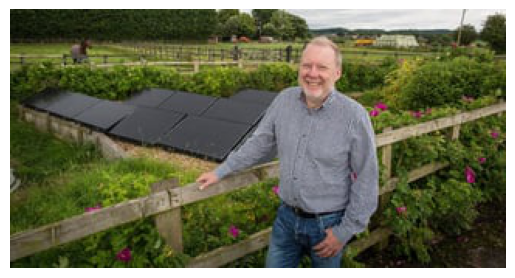

Claim:  english village becomes climate leader by quietly cleaning up its own patch
Class:  0


In [25]:
index = 11
# Example image URL
url = df['image_url'].iloc[index]


# Fetch the image data from the URL
response = requests.get(url)
image_data = response.content

# Convert the image data into a PIL Image object
img = Image.open(BytesIO(image_data))

# Display image using matplotlib
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.show()
print('Claim: ',df['clean_title'].iloc[index])
print('Class: ', df['3_way_label'].iloc[index])